In [21]:
from purkinje.models import Purkinje
import matplotlib.pyplot as plt
from purkinje.utils import ensure_dir
plt.style.use('ggplot')
import numpy as np
import os
import pdb

# Simulation 6: ISI/ITI ratio

We repeatedly train a simulated Purkinje cell in two conditions. First, the ITI is fixed while the ISI is increased. Second, the ITI varies as a fixed multiple of the ISI so that the ITI/ISI ratio is fixed. In the second case, we find that trials-to-acquisition is roughly constant as a function of ISI, whereas it's monotonic in the first case. 

## Set parameters

In [ ]:
num_steps = 10
ISIs = np.linspace(.1,1.0,num_steps)
# ISIs = [.2]
acq_trials=400
CS_onsets=[0.0]
CS_offsets = [0.3]

tau_j1_range = [60,120]
tau_j2_range = [150,250]
a_range = [1500,2500]
c_range = [.005, .015]
num_cells = 5

probe_start = 50
probe_per   = 5
fixed_ITI=5
CS_freq=50
US_freq = 500
thresh = 1.0 # Roughly when a pause appears. Used to stop training early and save compute time. 

## Run experiments

In [40]:
exp_pause_trials = {'varied':[], 'fixed':[]}

for mode in ['varied', 'fixed']:
    for ISI in ISIs:
        print('Running ISI: {}'.format(ISI))
        cell_pause_trials = []
        for c in range(num_cells):
            
            if mode == 'varied':
                ITI = fixed_ITI
            else:
                ITI = 80 * ISI
                                
            tau_j1 = (tau_j1_range[1] - tau_j1_range[0])*np.random.rand() + tau_j1_range[0]
            tau_j2 = (tau_j2_range[1] - tau_j2_range[0])*np.random.rand() + tau_j2_range[0]
            a = (a_range[1] - a_range[0])*np.random.rand() + a_range[0]
            c = (c_range[1] - c_range[0])*np.random.rand() + c_range[0]

            US_onsets=[CS_onsets[0] + ISI]
            US_offsets=[US_onsets[0] + .03]
            pk = Purkinje(tau_j1=tau_j1, tau_j2=tau_j2, a=a, c=c)
            pk.run(CS_onsets=CS_onsets, CS_offsets=CS_offsets, US_onsets=US_onsets, US_offsets=US_offsets,
                   ITI=ITI, CS_freq=CS_freq, US_freq=US_freq,trials=acq_trials, verbose=False,
                  early_stopping_I=thresh)

            cell_pause_trials.append(len(pk.all_I))

        exp_pause_trials[mode].append(cell_pause_trials)

    exp_pause_trials [mode]= np.array(exp_pause_trials[mode])

Running ISI: 0.1
Running ISI: 0.2
Running ISI: 0.30000000000000004
Running ISI: 0.4
Running ISI: 0.5
Running ISI: 0.6
Running ISI: 0.7000000000000001
Running ISI: 0.8
Running ISI: 0.9
Running ISI: 1.0
Running ISI: 0.1
Running ISI: 0.2
Running ISI: 0.30000000000000004
Running ISI: 0.4
Running ISI: 0.5
Running ISI: 0.6
Running ISI: 0.7000000000000001
Running ISI: 0.8
Running ISI: 0.9
Running ISI: 1.0


## Visualize

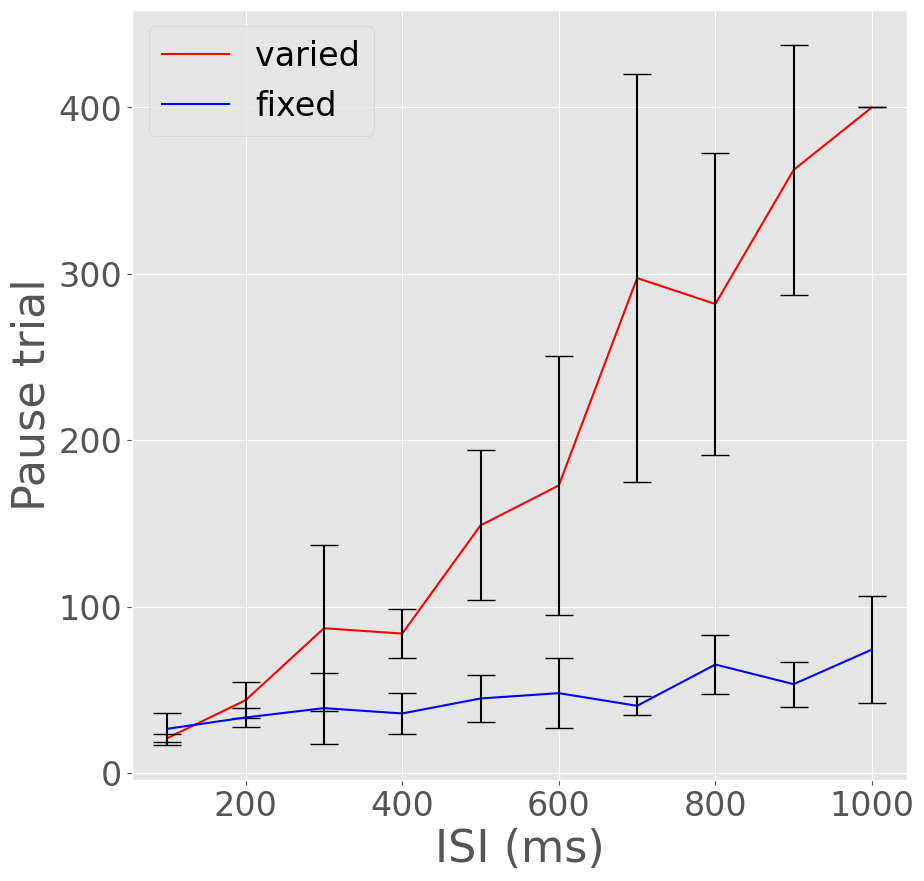

In [41]:
# Pause stats
from matplotlib.lines import Line2D

fig_save_dir = '../figures'
ensure_dir(fig_save_dir)

fig, ax = plt.subplots(figsize=(10,10))
colors = ['r', 'b']
modes = ['varied', 'fixed']
for mode, color in zip(modes, colors):
    
    arr = exp_pause_trials[mode]
    arr_means = arr.mean(1)
    arr_errs = arr.std(1)

    ax.plot(ISIs * 1000, arr_means,c=color)
    ax.errorbar(ISIs * 1000, arr_means, yerr=arr_errs, fmt="none", capsize=10.0, ecolor='black')
    ax.set_xlabel('ISI (ms)', fontsize=32)
    ax.set_ylabel('Pause trial', fontsize=32)
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=24)
    
plt.legend(modes, fontsize=24)
plt.savefig(os.path.join(fig_save_dir, 'ratio.pdf'))

